### Project

In [1]:
%matplotlib inline

In [2]:
from __future__ import division

In [3]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import random as py_random
import patsy
import sklearn.linear_model as linear

sns.set(style="darkgrid")

In [4]:
#reading BWI_DELAY file
BWI_DELAY = pd.read_csv( "BWI_DELAY.csv")
BWI_DELAY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94101 entries, 0 to 94100
Data columns (total 7 columns):
MONTH                  94101 non-null int64
ORIGIN                 94101 non-null object
CARRIER_DELAY          20295 non-null float64
WEATHER_DELAY          20295 non-null float64
NAS_DELAY              20295 non-null float64
SECURITY_DELAY         20295 non-null float64
LATE_AIRCRAFT_DELAY    20295 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 5.0+ MB


In [5]:
#reading IAD_DELAY file
IAD_DELAY = pd.read_csv( "IAD_DELAY.csv")
IAD_DELAY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37301 entries, 0 to 37300
Data columns (total 7 columns):
MONTH                  37301 non-null int64
ORIGIN                 37301 non-null object
CARRIER_DELAY          7353 non-null float64
WEATHER_DELAY          7353 non-null float64
NAS_DELAY              7353 non-null float64
SECURITY_DELAY         7353 non-null float64
LATE_AIRCRAFT_DELAY    7353 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.0+ MB


In [6]:
# function taken from notebook

def examine_data_frame( df):
    for name in df.columns:
        print "----------"
        print df[ name].value_counts()
        print "Name: ", name
        print df[ name].describe()

In [7]:
# examining the dataframe
examine_data_frame(BWI_DELAY)

----------
7     8745
6     8422
8     8338
5     8175
10    8022
12    7990
11    7886
4     7885
3     7762
9     7719
1     6921
2     6236
Name: MONTH, dtype: int64
Name:  MONTH
count    94101.000000
mean         6.650960
std          3.367673
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: MONTH, dtype: float64
----------
BWI    94101
Name: ORIGIN, dtype: int64
Name:  ORIGIN
count     94101
unique        1
top         BWI
freq      94101
Name: ORIGIN, dtype: object
----------
0.0       6902
15.0       449
6.0        442
5.0        436
8.0        430
16.0       416
17.0       397
7.0        388
4.0        384
10.0       381
9.0        369
3.0        367
11.0       352
1.0        351
2.0        349
13.0       348
18.0       345
12.0       345
14.0       316
19.0       309
20.0       309
22.0       283
21.0       278
23.0       236
25.0       225
24.0       218
27.0       188
26.0       181
29.0       153
31.0       

C:\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [8]:
# replacing values ' ' in column to np.nan

BWI_DELAY["CARRIER_DELAY"].replace([' '], np.nan ,inplace=True)
BWI_DELAY["WEATHER_DELAY"].replace([' '], np.nan ,inplace=True)
BWI_DELAY["NAS_DELAY"].replace([' '], np.nan ,inplace=True)
BWI_DELAY["SECURITY_DELAY"].replace([' '], np.nan ,inplace=True)
BWI_DELAY["LATE_AIRCRAFT_DELAY"].replace([' '], np.nan ,inplace=True)

IAD_DELAY["CARRIER_DELAY"].replace([' '], np.nan ,inplace=True)
IAD_DELAY["WEATHER_DELAY"].replace([' '], np.nan ,inplace=True)
IAD_DELAY["NAS_DELAY"].replace([' '], np.nan ,inplace=True)
IAD_DELAY["SECURITY_DELAY"].replace([' '], np.nan ,inplace=True)
IAD_DELAY["LATE_AIRCRAFT_DELAY"].replace([' '], np.nan ,inplace=True)

In [9]:
# examining the dataframe
examine_data_frame(BWI_DELAY)

----------
7     8745
6     8422
8     8338
5     8175
10    8022
12    7990
11    7886
4     7885
3     7762
9     7719
1     6921
2     6236
Name: MONTH, dtype: int64
Name:  MONTH
count    94101.000000
mean         6.650960
std          3.367673
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: MONTH, dtype: float64
----------
BWI    94101
Name: ORIGIN, dtype: int64
Name:  ORIGIN
count     94101
unique        1
top         BWI
freq      94101
Name: ORIGIN, dtype: object
----------
0.0       6902
15.0       449
6.0        442
5.0        436
8.0        430
16.0       416
17.0       397
7.0        388
4.0        384
10.0       381
9.0        369
3.0        367
11.0       352
1.0        351
2.0        349
13.0       348
18.0       345
12.0       345
14.0       316
19.0       309
20.0       309
22.0       283
21.0       278
23.0       236
25.0       225
24.0       218
27.0       188
26.0       181
29.0       153
31.0       

In [10]:
BWI_DELAY.head()

,MONTH,ORIGIN,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1,BWI,0.0,9.0,0.0,0.0,15.0
1,1,BWI,17.0,0.0,14.0,0.0,0.0
2,1,BWI,2.0,0.0,0.0,0.0,189.0
3,1,BWI,6.0,0.0,15.0,0.0,0.0
4,1,BWI,NaN,NaN,NaN,NaN,NaN


In [11]:
IAD_DELAY.head()

,MONTH,ORIGIN,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1,IAD,0.0,0.0,17.0,0.0,0.0
1,1,IAD,0.0,0.0,24.0,0.0,0.0
2,1,IAD,NaN,NaN,NaN,NaN,NaN
3,1,IAD,NaN,NaN,NaN,NaN,NaN
4,1,IAD,0.0,0.0,34.0,0.0,0.0


In [12]:
# removing NA values for EDA
BWI_DELAY_update = BWI_DELAY.dropna()
examine_data_frame(BWI_DELAY_update)

----------
7     2622
6     2390
8     1894
3     1816
12    1730
1     1547
4     1536
5     1491
2     1482
9     1355
10    1246
11    1186
Name: MONTH, dtype: int64
Name:  MONTH
count    20295.000000
mean         6.398867
std          3.272971
min          1.000000
25%          4.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: MONTH, dtype: float64
----------
BWI    20295
Name: ORIGIN, dtype: int64
Name:  ORIGIN
count     20295
unique        1
top         BWI
freq      20295
Name: ORIGIN, dtype: object
----------
0.0       6902
15.0       449
6.0        442
5.0        436
8.0        430
16.0       416
17.0       397
7.0        388
4.0        384
10.0       381
9.0        369
3.0        367
11.0       352
1.0        351
2.0        349
13.0       348
18.0       345
12.0       345
14.0       316
19.0       309
20.0       309
22.0       283
21.0       278
23.0       236
25.0       225
24.0       218
27.0       188
26.0       181
29.0       153
31.0       

In [13]:
# removing NA values for EDA
IAD_DELAY_update = IAD_DELAY.dropna()

In [14]:
BWI_DELAY_update.head()

,MONTH,ORIGIN,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1,BWI,0.0,9.0,0.0,0.0,15.0
1,1,BWI,17.0,0.0,14.0,0.0,0.0
2,1,BWI,2.0,0.0,0.0,0.0,189.0
3,1,BWI,6.0,0.0,15.0,0.0,0.0
6,1,BWI,7.0,0.0,14.0,0.0,13.0


In [15]:
IAD_DELAY_update.head()

,MONTH,ORIGIN,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1,IAD,0.0,0.0,17.0,0.0,0.0
1,1,IAD,0.0,0.0,24.0,0.0,0.0
4,1,IAD,0.0,0.0,34.0,0.0,0.0
5,1,IAD,0.0,0.0,51.0,0.0,0.0
8,1,IAD,22.0,0.0,3.0,0.0,0.0


In [16]:
BWI_carrier_delay_mean  = np.mean(BWI_DELAY_update["CARRIER_DELAY"])
BWI_weather_delay_mean = np.mean(BWI_DELAY_update["WEATHER_DELAY"])
BWI_nas_delay_mean = np.mean(BWI_DELAY_update["NAS_DELAY"])
BWI_security_delay_mean = np.mean(BWI_DELAY_update["SECURITY_DELAY"])
BWI_late_aircraft_delay_mean = np.mean(BWI_DELAY_update["LATE_AIRCRAFT_DELAY"])

IAD_carrier_delay_mean  = np.mean(IAD_DELAY_update["CARRIER_DELAY"])
IAD_weather_delay_mean = np.mean(IAD_DELAY_update["WEATHER_DELAY"])
IAD_nas_delay_mean = np.mean(IAD_DELAY_update["NAS_DELAY"])
IAD_security_delay_mean = np.mean(IAD_DELAY_update["SECURITY_DELAY"])
IAD_late_aircraft_delay_mean = np.mean(IAD_DELAY_update["LATE_AIRCRAFT_DELAY"])

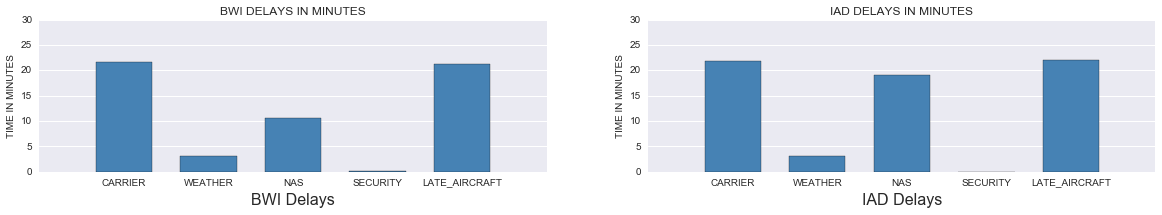

In [17]:
figure = plt.figure(figsize=(20, 6))

xs = [1, 2, 3, 4, 5]
BWI_data = [BWI_carrier_delay_mean, BWI_weather_delay_mean, BWI_nas_delay_mean, BWI_security_delay_mean, BWI_late_aircraft_delay_mean]

IAD_data = [IAD_carrier_delay_mean, IAD_weather_delay_mean, IAD_nas_delay_mean, IAD_security_delay_mean, IAD_late_aircraft_delay_mean]
width = 1/1.5

axes = figure.add_subplot(2, 2, 1)

#axes.plot(xs, data, "o", color="steelblue")
plt.ylabel('TIME IN MINUTES', fontsize=10)
plt.xlabel('BWI Delays', fontsize=16)
#axes.vlines(xs, [0], data, linestyles='dotted', lw=2)
axes.bar(xs, BWI_data, width, color="steelblue", align="center")
axes.set_xticks(xs)
axes.set_xlim((0, 6))
axes.set_ylim((0, 30))
axes.set_xticklabels(["CARRIER", "WEATHER", "NAS", "SECURITY", "LATE_AIRCRAFT"])
axes.set_title('BWI DELAYS IN MINUTES')
axes.xaxis.grid(False)

axes = figure.add_subplot(2, 2, 2)

#axes.plot(xs, data, "o", color="steelblue")
plt.ylabel('TIME IN MINUTES', fontsize=10)
plt.xlabel('IAD Delays', fontsize=16)
#axes.vlines(xs, [0], data, linestyles='dotted', lw=2)
axes.bar(xs, IAD_data, width, color="steelblue", align="center")
axes.set_xticks(xs)
axes.set_xlim((0, 6))
axes.set_ylim((0, 30))
axes.set_xticklabels(["CARRIER", "WEATHER", "NAS", "SECURITY", "LATE_AIRCRAFT"])
axes.set_title('IAD DELAYS IN MINUTES')
axes.xaxis.grid(False)

http://aspmhelp.faa.gov/index.php/Types_of_Delay#NAS_Delay

Carrier Delay
Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.

Weather Delay
Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.

NAS Delay
Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc. Delays that occur after Actual Gate Out are usually attributed to the NAS and are also reported through OPSNET.

Security Delay
Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

Late Arrival Delay
Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. 

We can see from the above plot that NAS delays are higher at IAD as compared to BWI

In [18]:
#reading BWI_FLIGHT file
BWI_FLIGHT = pd.read_csv( "BWI_FLIGHT.csv")
BWI_FLIGHT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90033 entries, 0 to 90032
Data columns (total 10 columns):
MONTH            90033 non-null int64
CARRIER          90033 non-null object
ORIGIN           90033 non-null object
DEST             90033 non-null object
DEP_DELAY_NEW    88647 non-null float64
DEP_DEL15        88647 non-null float64
ARR_DELAY_NEW    88383 non-null float64
ARR_DEL15        88383 non-null float64
CANCELLED        90033 non-null int64
DEP_TIME         88647 non-null float64
dtypes: float64(5), int64(2), object(3)
memory usage: 6.9+ MB


In [19]:
#reading IAD_FLIGHT file
IAD_FLIGHT = pd.read_csv( "IAD_FLIGHT.csv")
IAD_FLIGHT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31210 entries, 0 to 31209
Data columns (total 10 columns):
MONTH            31210 non-null int64
CARRIER          31210 non-null object
ORIGIN           31210 non-null object
DEST             31210 non-null object
DEP_DELAY_NEW    30876 non-null float64
DEP_DEL15        30876 non-null float64
ARR_DELAY_NEW    30768 non-null float64
ARR_DEL15        30768 non-null float64
CANCELLED        31210 non-null int64
DEP_TIME         30876 non-null float64
dtypes: float64(5), int64(2), object(3)
memory usage: 2.4+ MB


In [20]:
examine_data_frame(BWI_FLIGHT)

----------
7     8581
8     8152
6     7954
5     7752
10    7740
12    7722
11    7617
9     7489
4     7474
3     7297
1     6450
2     5805
Name: MONTH, dtype: int64
Name:  MONTH
count    90033.000000
mean         6.696056
std          3.357110
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: MONTH, dtype: float64
----------
WN    69868
DL     7121
AA     4646
UA     3317
NK     3147
B6     1934
Name: CARRIER, dtype: int64
Name:  CARRIER
count     90033
unique        6
top          WN
freq      69868
Name: CARRIER, dtype: object
----------
BWI    90033
Name: ORIGIN, dtype: int64
Name:  ORIGIN
count     90033
unique        1
top         BWI
freq      90033
Name: ORIGIN, dtype: object
----------
ATL    6418
BOS    4838
FLL    4286
MCO    3334
PVD    2763
DTW    2618
MHT    2439
BDL    2407
TPA    2358
CLT    2209
MDW    2178
RDU    2128
DEN    2086
BNA    2068
BUF    1979
DFW    1922
ALB    1879
LAS    1866
ORD    1774

In [21]:
examine_data_frame(IAD_FLIGHT)

----------
6     2935
7     2883
5     2820
8     2809
10    2711
4     2605
12    2604
9     2603
11    2524
3     2496
1     2224
2     1996
Name: MONTH, dtype: int64
Name:  MONTH
count    31210.000000
mean         6.665684
std          3.335299
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: MONTH, dtype: float64
----------
UA    19793
AA     2698
DL     2628
WN     2380
B6     2072
VX     1639
Name: CARRIER, dtype: int64
Name:  CARRIER
count     31210
unique        6
top          UA
freq      19793
Name: CARRIER, dtype: object
----------
IAD    31210
Name: ORIGIN, dtype: int64
Name:  ORIGIN
count     31210
unique        1
top         IAD
freq      31210
Name: ORIGIN, dtype: object
----------
SFO    3984
LAX    3959
DEN    3386
ATL    2333
BOS    2233
ORD    1616
DFW    1458
IAH    1430
MCO    1418
SAN    1231
TPA    1043
JFK    1038
LAS    1010
SEA     891
MDW     742
MIA     673
RDU     455
PHX     365
MSP     285

In [22]:
BWI_FLIGHT["DEP_DELAY_NEW"].replace([' '], np.nan ,inplace=True)
BWI_FLIGHT["DEP_DEL15"].replace([' '], np.nan ,inplace=True)
BWI_FLIGHT["ARR_DELAY_NEW"].replace([' '], np.nan ,inplace=True)
BWI_FLIGHT["ARR_DEL15"].replace([' '], np.nan ,inplace=True)
BWI_FLIGHT["CANCELLED"].replace([' '], np.nan ,inplace=True)
BWI_FLIGHT["DEP_TIME"].replace([' '], np.nan ,inplace=True)

IAD_FLIGHT["DEP_DELAY_NEW"].replace([' '], np.nan ,inplace=True)
IAD_FLIGHT["DEP_DEL15"].replace([' '], np.nan ,inplace=True)
IAD_FLIGHT["ARR_DELAY_NEW"].replace([' '], np.nan ,inplace=True)
IAD_FLIGHT["ARR_DEL15"].replace([' '], np.nan ,inplace=True)
IAD_FLIGHT["CANCELLED"].replace([' '], np.nan ,inplace=True)
IAD_FLIGHT["DEP_TIME"].replace([' '], np.nan ,inplace=True)

In [23]:
# removing NA values for EDA
BWI_FLIGHT_update = BWI_FLIGHT.dropna()
IAD_FLIGHT_update = IAD_FLIGHT.dropna()

In [24]:
examine_data_frame(IAD_FLIGHT_update)

----------
6     2866
7     2856
5     2794
8     2775
10    2695
9     2588
4     2575
12    2568
11    2500
3     2433
1     2195
2     1923
Name: MONTH, dtype: int64
Name:  MONTH
count    30768.000000
mean         6.680837
std          3.332515
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: MONTH, dtype: float64
----------
UA    19526
AA     2651
DL     2615
WN     2338
B6     2007
VX     1631
Name: CARRIER, dtype: int64
Name:  CARRIER
count     30768
unique        6
top          UA
freq      19526
Name: CARRIER, dtype: object
----------
IAD    30768
Name: ORIGIN, dtype: int64
Name:  ORIGIN
count     30768
unique        1
top         IAD
freq      30768
Name: ORIGIN, dtype: object
----------
SFO    3943
LAX    3920
DEN    3338
ATL    2320
BOS    2194
ORD    1575
DFW    1417
MCO    1404
IAH    1400
SAN    1214
TPA    1036
LAS    1001
JFK     998
SEA     884
MDW     723
MIA     667
RDU     447
PHX     359
MSP     285

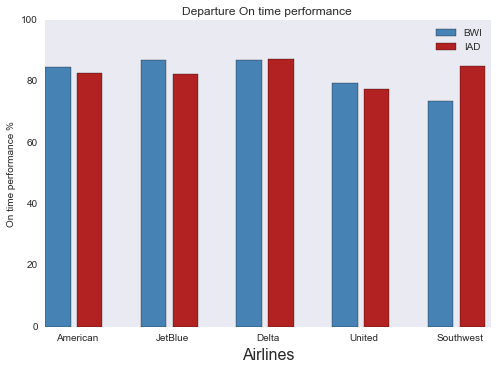

In [70]:

BWI_frequencies = pd.crosstab( BWI_FLIGHT_update[ "CARRIER"], BWI_FLIGHT_update[ "DEP_DEL15"]).apply(lambda r: r/r.sum(), axis=1)
IAD_frequencies = pd.crosstab( IAD_FLIGHT_update[ "CARRIER"], IAD_FLIGHT_update[ "DEP_DEL15"]).apply(lambda r: r/r.sum(), axis=1)

BWI_ON_TIME = plt.Rectangle((1, 1), 0.5, 0.5, fc="steelblue")
IAD_ON_TIME = plt.Rectangle((1, 1), 0.5, 0.5, fc="firebrick")

plt.legend((BWI_ON_TIME, IAD_ON_TIME), ('BWI','IAD'), loc='upper right')

x = np.array([0,1,3,4,6,7,9,10,12,13])

y = np.array([BWI_frequencies[0][0]*100,IAD_frequencies[0][0]*100,BWI_frequencies[0][1]*100,IAD_frequencies[0][1]*100, BWI_frequencies[0][2]*100, IAD_frequencies[0][2]*100, BWI_frequencies[0][4]*100,IAD_frequencies[0][3]*100, BWI_frequencies[0][5]*100, IAD_frequencies[0][5]*100 ])

labels = ['','American',  '',  'JetBlue',  '',  'Delta',  '' ,  'United', '', 'Southwest']

plt.xticks(x, labels)

plt.bar(left = x, height=y, color=['steelblue', 'firebrick'])

plt.grid(which='both')
plt.title('Departure On time performance ')
plt.ylabel('On time performance %', fontsize=10)
plt.xlabel('Airlines', fontsize=16)

plt.axis([0,14, 0,100])

plt.show()

Southwest seems to have a better on time performace from IAD as compared to BWI and JetBlue seems to have a better on time performance from BWI

In [27]:
grouped = BWI_FLIGHT_update.groupby( "CARRIER")
curb_weight = grouped[ "DEP_DELAY_NEW"].describe()
curb_weight = curb_weight.unstack( level=-1)
print curb_weight

           count       mean        std  min  25%  50%   75%     max
CARRIER                                                            
AA        4572.0  11.742563  47.838975  0.0  0.0  0.0   4.0  1340.0
B6        1896.0   9.458861  33.205610  0.0  0.0  0.0   0.0   406.0
DL        7081.0  11.260415  44.663161  0.0  0.0  0.0   3.0   975.0
NK        3095.0  19.866236  44.910630  0.0  0.0  1.0  19.0   745.0
UA        3258.0  14.387661  43.673037  0.0  0.0  0.0   9.0   850.0
WN       68481.0  15.141426  32.860554  0.0  0.0  1.0  16.0   490.0


In [69]:
grouped = IAD_FLIGHT_update.groupby( "CARRIER")
curb_weight = grouped[ "DEP_DELAY_NEW"].describe()
curb_weight = curb_weight.unstack( level=-1)
print curb_weight

           count       mean        std  min  25%  50%   75%     max
CARRIER                                                            
AA        2651.0  14.923802  66.749689  0.0  0.0  0.0   5.0  1179.0
B6        2007.0  12.923767  39.273267  0.0  0.0  0.0   3.0   577.0
DL        2615.0   9.969407  39.223544  0.0  0.0  0.0   2.0   654.0
UA       19526.0  15.535491  38.912021  0.0  0.0  1.0  12.0   685.0
VX        1631.0   8.153893  26.808322  0.0  0.0  0.0   3.0   263.0
WN        2338.0  10.264756  36.040207  0.0  0.0  0.0   4.0   604.0


CANCELLED         0         1
CARRIER                      
AA         0.987516  0.012484
B6         0.980869  0.019131
DL         0.996911  0.003089
NK         0.984747  0.015253
UA         0.985228  0.014772
WN         0.982581  0.017419


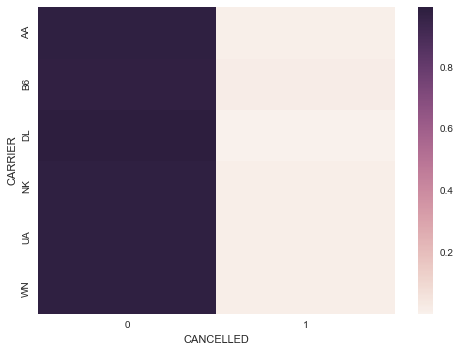

In [29]:
frequencies = pd.crosstab( BWI_FLIGHT[ "CARRIER"], BWI_FLIGHT[ "CANCELLED"]).apply(lambda r: r/r.sum(), axis=1)
print frequencies

sns.heatmap( frequencies)

CANCELLED         0         1
CARRIER                      
AA         0.987398  0.012602
B6         0.970560  0.029440
DL         0.996575  0.003425
UA         0.988784  0.011216
VX         0.995119  0.004881
WN         0.988235  0.011765


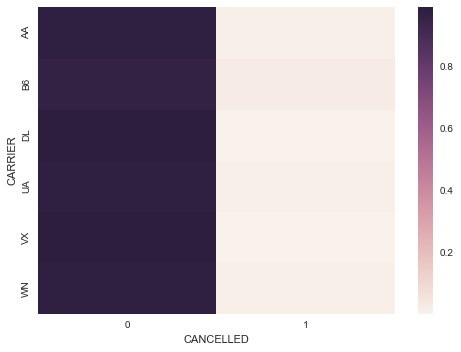

In [30]:
frequencies = pd.crosstab( IAD_FLIGHT[ "CARRIER"], IAD_FLIGHT[ "CANCELLED"]).apply(lambda r: r/r.sum(), axis=1)
print frequencies

sns.heatmap( frequencies)

In [31]:
# function to calculate number of flights
def num_flight(data_flight, airport):
    american_airline = 0
    Jetblue = 0
    Delta = 0
    United = 0
    Spirit = 0
    Southwest = 0
    num = []
    for flight in data_flight.index:
        if ((data_flight["DEST"][flight] == airport) and (data_flight["CARRIER"][flight] == "AA")):
            american_airline = american_airline +1
        elif ((data_flight["DEST"][flight] == airport) and (data_flight["CARRIER"][flight] == "B6")):
            Jetblue = Jetblue +1
        elif ((data_flight["DEST"][flight] == airport) and (data_flight["CARRIER"][flight] == "DL")):
            Delta = Delta +1
        elif ((data_flight["DEST"][flight] == airport) and (data_flight["CARRIER"][flight] == "UA")):
            United = United +1
        elif ((data_flight["DEST"][flight] == airport) and (data_flight["CARRIER"][flight] == "NK")):
            Spirit= Spirit +1
        elif ((data_flight["DEST"][flight] == airport) and (data_flight["CARRIER"][flight] == "WN")):
            Southwest = Southwest +1
       
    num = [american_airline, Jetblue, Delta, United, Spirit, Southwest]
    return num
        

In [32]:
# function to calculate departure delay by destination and month in 2015
def mean_monthly_flight_data(data_flight, airport):
    month_delay_1 = [] 
    month_delay_2 = []
    month_delay_3 = []
    month_delay_4 = [] 
    month_delay_5 = [] 
    month_delay_6 = [] 
    month_delay_7 = [] 
    month_delay_8 = [] 
    month_delay_9 = []
    month_delay_10 = []
    month_delay_11 = [] 
    month_delay_12 = [] 
    mean_monthly_delay= []
    for flight in data_flight.index:
        if ((data_flight["DEST"][flight] == airport) and (data_flight["MONTH"][flight] == 1)):
            month_delay_1.append(data_flight["DEP_DELAY_NEW"][flight])
        elif ((data_flight["DEST"][flight] == airport) and (data_flight["MONTH"][flight] == 2)):
            month_delay_2.append(data_flight["DEP_DELAY_NEW"][flight])
        elif ((data_flight["DEST"][flight] == airport) and (data_flight["MONTH"][flight] == 3)):
            month_delay_3.append(data_flight["DEP_DELAY_NEW"][flight])
        elif ((data_flight["DEST"][flight] == airport) and (data_flight["MONTH"][flight] == 4)):
            month_delay_4.append(data_flight["DEP_DELAY_NEW"][flight])
        elif ((data_flight["DEST"][flight] == airport) and (data_flight["MONTH"][flight] == 5)):
            month_delay_5.append(data_flight["DEP_DELAY_NEW"][flight])
        elif ((data_flight["DEST"][flight] == airport) and (data_flight["MONTH"][flight] == 6)):
            month_delay_6.append(data_flight["DEP_DELAY_NEW"][flight])
        elif ((data_flight["DEST"][flight] == airport) and (data_flight["MONTH"][flight] == 7)):
            month_delay_7.append(data_flight["DEP_DELAY_NEW"][flight])
        elif ((data_flight["DEST"][flight] == airport) and (data_flight["MONTH"][flight] == 8)):
            month_delay_8.append(data_flight["DEP_DELAY_NEW"][flight])
        elif ((data_flight["DEST"][flight] == airport) and (data_flight["MONTH"][flight] == 9)):
            month_delay_9.append(data_flight["DEP_DELAY_NEW"][flight])
        elif ((data_flight["DEST"][flight] == airport) and (data_flight["MONTH"][flight] == 10)):
            month_delay_10.append(data_flight["DEP_DELAY_NEW"][flight])
        elif ((data_flight["DEST"][flight] == airport) and (data_flight["MONTH"][flight] == 11)):
            month_delay_11.append(data_flight["DEP_DELAY_NEW"][flight])
        elif ((data_flight["DEST"][flight] == airport) and (data_flight["MONTH"][flight] == 12)):
            month_delay_12.append(data_flight["DEP_DELAY_NEW"][flight])
    mean_monthly_delay.extend((np.mean(month_delay_1), np.mean(month_delay_2), np.mean(month_delay_3), np.mean(month_delay_4), 
                               np.mean(month_delay_5), np.mean(month_delay_6), np.mean(month_delay_7), np.mean(month_delay_8),
                              np.mean(month_delay_9), np.mean(month_delay_10), np.mean(month_delay_11), np.mean(month_delay_12)))
    return mean_monthly_delay
        
    


In [33]:
Bwi_Boston_monthly_delay = mean_monthly_flight_data(BWI_FLIGHT_update, "BOS")
Iad_Boston_monthly_delay = mean_monthly_flight_data(IAD_FLIGHT_update, "BOS")

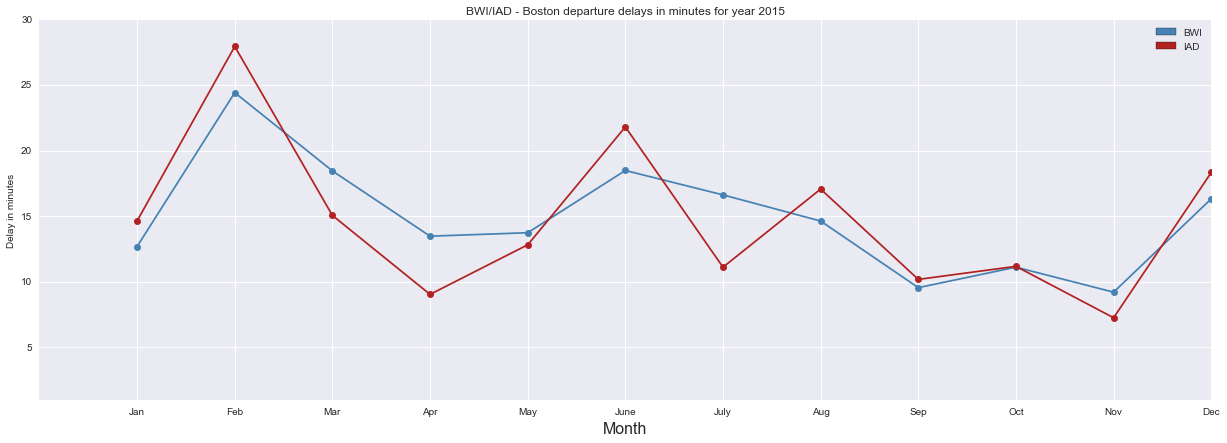

In [46]:
figure = plt.figure(figsize=(21, 15))

xs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

axes = figure.add_subplot(2, 1, 1)
axes.plot(xs, Bwi_Boston_monthly_delay, "o-", color="steelblue")
axes.plot(xs, Iad_Boston_monthly_delay, "o-", color="firebrick")
axes.set_xlim((0, 12))
axes.set_ylim((1, 30))
axes.set_xticks(xs)
plt.ylabel('Delay in minutes', fontsize=10)
plt.xlabel('Month', fontsize=16)

BWI_cancel = plt.Rectangle((1, 1), 0.05, 0.05, fc="steelblue")
IAD_cancel = plt.Rectangle((1, 1), 0.05, 0.05, fc="firebrick")

plt.legend((BWI_cancel, IAD_cancel), ('BWI','IAD'), loc='upper right')

axes.set_title('BWI/IAD - Boston departure delays in minutes for year 2015')
axes.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"])



In [37]:
Bwi_Miami_monthly_delay = mean_monthly_flight_data(BWI_FLIGHT_update, "MIA")
Iad_Miami_monthly_delay = mean_monthly_flight_data(IAD_FLIGHT_update, "MIA")

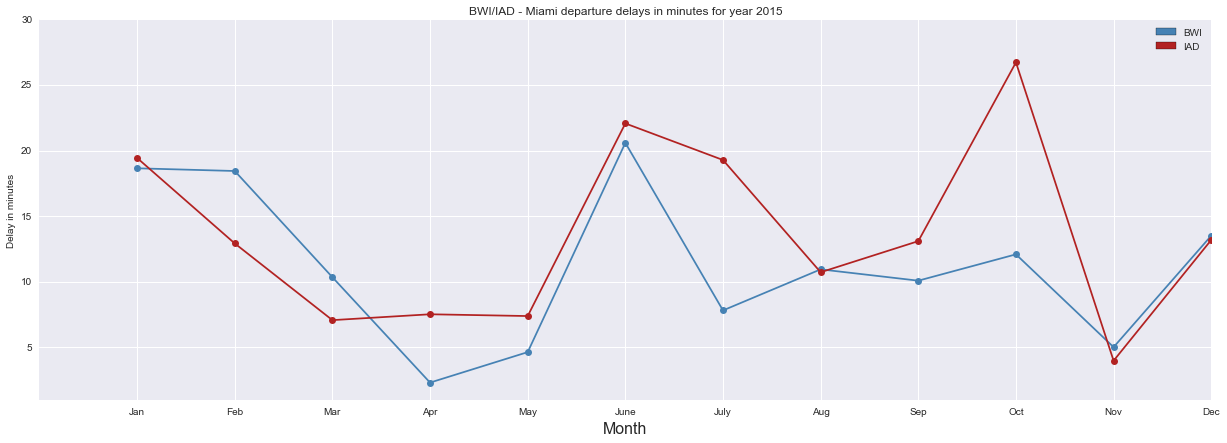

In [45]:
figure = plt.figure(figsize=(21, 15))

xs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

axes = figure.add_subplot(2, 1, 1)
axes.plot(xs, Bwi_Miami_monthly_delay, "o-", color="steelblue")
axes.plot(xs, Iad_Miami_monthly_delay, "o-", color="firebrick")
axes.set_xlim((0, 12))
axes.set_ylim((1, 30))
axes.set_xticks(xs)
plt.ylabel('Delay in minutes', fontsize=10)
plt.xlabel('Month', fontsize=16)

BWI_cancel = plt.Rectangle((1, 1), 0.05, 0.05, fc="steelblue")
IAD_cancel = plt.Rectangle((1, 1), 0.05, 0.05, fc="firebrick")

plt.legend((BWI_cancel, IAD_cancel), ('BWI','IAD'), loc='upper right')

axes.set_title('BWI/IAD - Miami departure delays in minutes for year 2015')
axes.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"])



In [62]:
Bwi_Chicago_monthly_delay = mean_monthly_flight_data(BWI_FLIGHT_update, "ORD")
Iad_Chicago_monthly_delay = mean_monthly_flight_data(IAD_FLIGHT_update, "ORD")

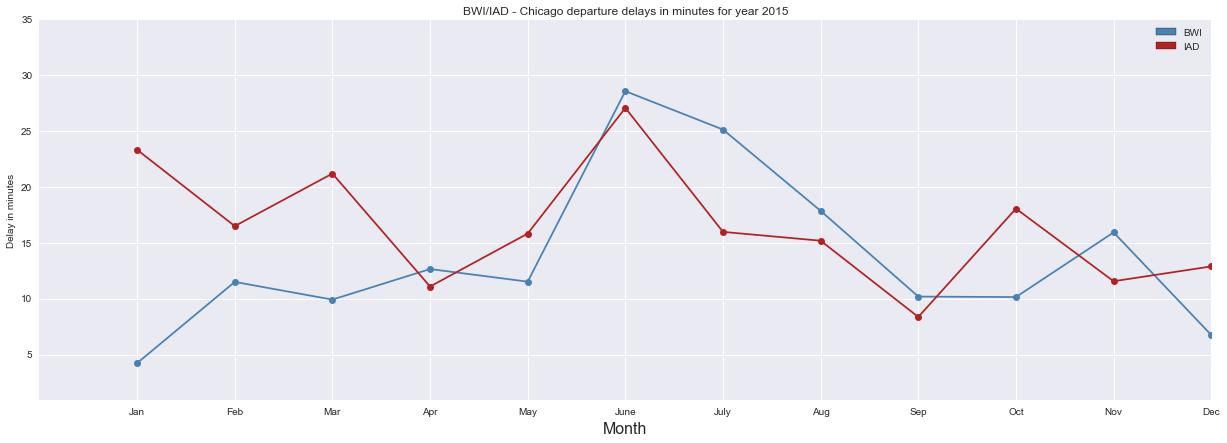

In [63]:
figure = plt.figure(figsize=(21, 15))

xs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

axes = figure.add_subplot(2, 1, 1)
axes.plot(xs, Bwi_Chicago_monthly_delay, "o-", color="steelblue")
axes.plot(xs, Iad_Chicago_monthly_delay, "o-", color="firebrick")
axes.set_xlim((0, 12))
axes.set_ylim((1, 35))
axes.set_xticks(xs)
plt.ylabel('Delay in minutes', fontsize=10)
plt.xlabel('Month', fontsize=16)

BWI_cancel = plt.Rectangle((1, 1), 0.05, 0.05, fc="steelblue")
IAD_cancel = plt.Rectangle((1, 1), 0.05, 0.05, fc="firebrick")

plt.legend((BWI_cancel, IAD_cancel), ('BWI','IAD'), loc='upper right')

axes.set_title('BWI/IAD - Chicago departure delays in minutes for year 2015')
axes.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"])


In [58]:
Bwi_las_monthly_delay = mean_monthly_flight_data(BWI_FLIGHT_update, "LAS")
Iad_las_monthly_delay = mean_monthly_flight_data(IAD_FLIGHT_update, "LAS")

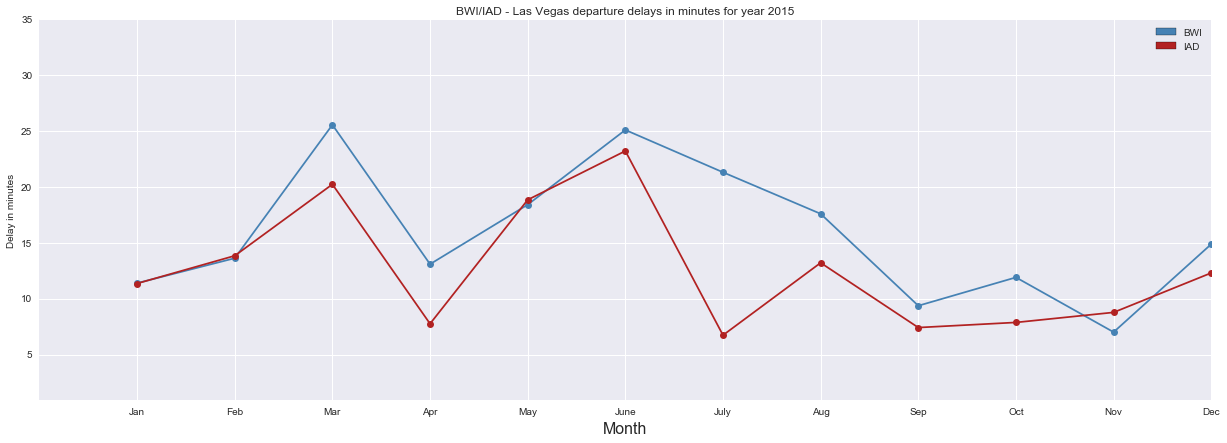

In [59]:
figure = plt.figure(figsize=(21, 15))

xs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

axes = figure.add_subplot(2, 1, 1)
axes.plot(xs, Bwi_las_monthly_delay, "o-", color="steelblue")
axes.plot(xs, Iad_las_monthly_delay, "o-", color="firebrick")
axes.set_xlim((0, 12))
axes.set_ylim((1, 35))
axes.set_xticks(xs)
plt.ylabel('Delay in minutes', fontsize=10)
plt.xlabel('Month', fontsize=16)

BWI_cancel = plt.Rectangle((1, 1), 0.05, 0.05, fc="steelblue")
IAD_cancel = plt.Rectangle((1, 1), 0.05, 0.05, fc="firebrick")

plt.legend((BWI_cancel, IAD_cancel), ('BWI','IAD'), loc='upper right')

axes.set_title('BWI/IAD - Las Vegas departure delays in minutes for year 2015')
axes.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"])


In [60]:
Bwi_lax_monthly_delay = mean_monthly_flight_data(BWI_FLIGHT_update, "LAX")
Iad_lax_monthly_delay = mean_monthly_flight_data(IAD_FLIGHT_update, "LAX")

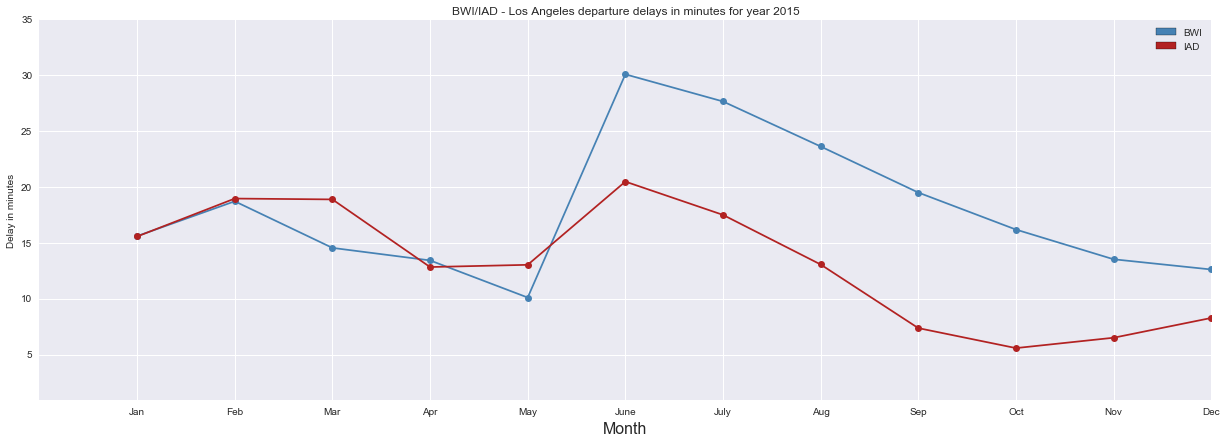

In [61]:
figure = plt.figure(figsize=(21, 15))

xs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

axes = figure.add_subplot(2, 1, 1)
axes.plot(xs, Bwi_lax_monthly_delay, "o-", color="steelblue")
axes.plot(xs, Iad_lax_monthly_delay, "o-", color="firebrick")
axes.set_xlim((0, 12))
axes.set_ylim((1, 35))
axes.set_xticks(xs)
plt.ylabel('Delay in minutes', fontsize=10)
plt.xlabel('Month', fontsize=16)

BWI_cancel = plt.Rectangle((1, 1), 0.05, 0.05, fc="steelblue")
IAD_cancel = plt.Rectangle((1, 1), 0.05, 0.05, fc="firebrick")

plt.legend((BWI_cancel, IAD_cancel), ('BWI','IAD'), loc='upper right')

axes.set_title('BWI/IAD - Los Angeles departure delays in minutes for year 2015')
axes.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"])


In [40]:
Bwi_Boston_num_flight = num_flight(BWI_FLIGHT_update, "BOS")
Iad_Boston_num_flight = num_flight(IAD_FLIGHT_update, "BOS")

In [42]:
Bwi_Boston_num_flight = num_flight(BWI_FLIGHT_update, "LAX")
Iad_Boston_num_flight = num_flight(IAD_FLIGHT_update, "LAX")

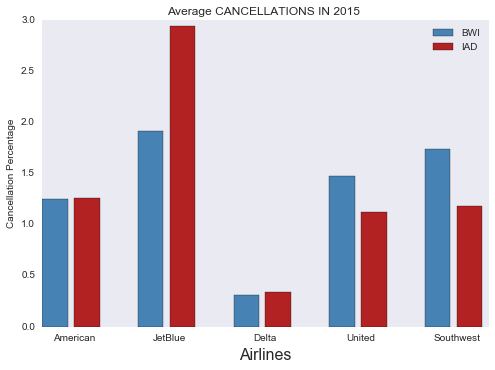

In [44]:

BWI_Cancellation_frequencies = pd.crosstab( BWI_FLIGHT[ "CARRIER"], BWI_FLIGHT[ "CANCELLED"]).apply(lambda r: r/r.sum(), axis=1)
IAD_Cancellation_frequencies = pd.crosstab( IAD_FLIGHT[ "CARRIER"], IAD_FLIGHT[ "CANCELLED"]).apply(lambda r: r/r.sum(), axis=1)

BWI_cancel = plt.Rectangle((1, 1), 0.5, 0.5, fc="steelblue")
IAD_cancel = plt.Rectangle((1, 1), 0.5, 0.5, fc="firebrick")

plt.legend((BWI_cancel, IAD_cancel), ('BWI','IAD'), loc='upper right')

x = np.array([0,1,3,4,6,7,9,10,12,13])

y = np.array([BWI_Cancellation_frequencies[1][0]*100,IAD_Cancellation_frequencies[1][0]*100,BWI_Cancellation_frequencies[1][1]*100,IAD_Cancellation_frequencies[1][1]*100, BWI_Cancellation_frequencies[1][2]*100, IAD_Cancellation_frequencies[1][2]*100, BWI_Cancellation_frequencies[1][4]*100,IAD_Cancellation_frequencies[1][3]*100, BWI_Cancellation_frequencies[1][5]*100, IAD_Cancellation_frequencies[1][5]*100 ])

labels = ['','American',  '',  'JetBlue',  '',  'Delta',  '' ,  'United', '', 'Southwest']

plt.xticks(x, labels)

plt.bar(left = x, height=y, color=['steelblue', 'firebrick'])

plt.grid(which='both')
plt.title('Average CANCELLATIONS IN 2015 ')
plt.ylabel('Cancellation Percentage', fontsize=10)
plt.xlabel('Airlines', fontsize=16)

plt.axis([0,14, 0,3])

plt.show()

JetBlue seems to have the highest average cancellations(around 3%) from IAD and Delta airlines seems to have the lowest cancellations.

In [65]:
# function to calculate average departure delay by hour in day
def mean_daily_delay(data_flight):
    late_night = [] 
    early_morning = []
    morning = []
    afternoon = [] 
    evening = []  
    night= []
    mean_day_delay = []
    for departure in data_flight.index:
        if ((data_flight["DEP_TIME"][departure] > 1) and (data_flight["DEP_TIME"][departure] < 500)):
             late_night.append(data_flight["DEP_DELAY_NEW"][departure])
        elif ((data_flight["DEP_TIME"][departure] > 500) and (data_flight["DEP_TIME"][departure] < 900)):
             early_morning.append(data_flight["DEP_DELAY_NEW"][departure])
        elif ((data_flight["DEP_TIME"][departure] > 900) and (data_flight["DEP_TIME"][departure] < 1200)):
             morning.append(data_flight["DEP_DELAY_NEW"][departure]) 
        elif ((data_flight["DEP_TIME"][departure] > 1200) and (data_flight["DEP_TIME"][departure] < 1600)):
             afternoon.append(data_flight["DEP_DELAY_NEW"][departure])
        elif ((data_flight["DEP_TIME"][departure] > 1600) and (data_flight["DEP_TIME"][departure] < 2000)):
             evening.append(data_flight["DEP_DELAY_NEW"][departure])
        elif ((data_flight["DEP_TIME"][departure] > 2000) and (data_flight["DEP_TIME"][departure] < 2400)):
            night.append(data_flight["DEP_DELAY_NEW"][departure]) 
    mean_day_delay.extend((np.mean(early_morning), np.mean(morning), np.mean(afternoon), 
                               np.mean(evening), np.mean(night)))
    return mean_day_delay

In [66]:
Bwi_daily_delay = mean_daily_delay(BWI_FLIGHT_update)
Iad_daily_delay = mean_daily_delay(IAD_FLIGHT_update)

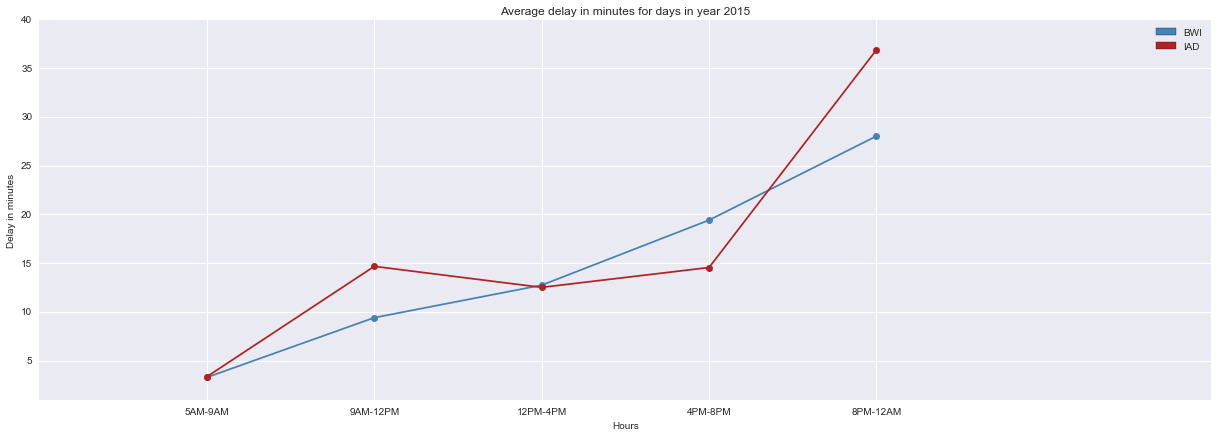

In [68]:
figure = plt.figure(figsize=(21, 15))

xs = [1, 2, 3, 4, 5]

axes = figure.add_subplot(2, 1, 1)
axes.plot(xs, Bwi_daily_delay, "o-", color="steelblue")
axes.plot(xs, Iad_daily_delay, "o-", color="firebrick")
axes.set_xlim((0, 7))
axes.set_ylim((1, 40))
axes.set_xticks(xs)
plt.ylabel('Delay in minutes', fontsize=10)
plt.xlabel('Hours', fontsize=10)

BWI_cancel = plt.Rectangle((1, 1), 0.05, 0.05, fc="steelblue")
IAD_cancel = plt.Rectangle((1, 1), 0.05, 0.05, fc="firebrick")

plt.legend((BWI_cancel, IAD_cancel), ('BWI','IAD'), loc='upper right')
#plt.xlabel('Month', fontsize=16)
axes.set_title('Average delay in minutes for days in year 2015')
axes.set_xticklabels(["5AM-9AM", "9AM-12PM", "12PM-4PM", "4PM-8PM", "8PM-12AM"])


We can see from the above plot that BWI is better than IAD in terms of average delay, if your flight departs 9AM-12PM or 8PM-12AM

(peak hours: 6:00 am to 9:00 am and 4:00 pm to 8:00 pm)

The below suggestions are recommended if you travelling to airport by car.

If you flying to any of these destinations by JetBlue Airline then it is recommended to take flight from BWI as JetBlue has higher cancellation rate at IAD.

Delta would be the best airline to travel as it has the highest on time performance as lowest cancellation rate.


A.) If you are staying in Washington DC: 

Distance to BWI: 30 miles 
non peak hours: 40 min by car and around 30 minutes by public transport.
peak hours:50 min by car and around 35 minutes by public transport.

Distance to IAD: 27 miles 
non peak hours :(30 min by car) and around an hour by public transport.
peak hours: 50 min by car and around an hour by public transport.

If you stay in Washington DC and want to fly to Boston in the month of July or October It would be recommended to fly from BWI instead of IAD as the difference in average departure delay is around 10-15 minutes. It is also recommended to take flight in the mornings instead of evenings if you want to avoid delays.

If you stay in Washington DC and want to fly to Las Vegas in the month of July.It would be recommended to fly from IAD instead of BWI as the difference in average departure delay is around 20 minutes.

B.) If you staying in College Park MD:

Distance to BWI: 25 miles
non peak hours: (30 min by car) and around 47 minutes by public transport.
peak hours: 50 min by car and around 47 minutes by public transport.

Distance to IAD: 36 miles 
non peak hours :(40 min by car) and around 1.5 hour by public transport.
peak hours: 1 hour by car and around 1.5 hour by public transport.

If you stay in College Park and want to fly to Chicago in the month of January.It would be recommended to fly from BWI instead of IAD as the difference in average departure delay is around 20 minutes.

C.) If you staying in Arlington VA:

Distance to BWI: 38 miles
non peak hours: (45 min by car) and around 1.5 hour by public transport.
peak hours: 1 hour by car and around 47 minutes by public transport.

Distance to IAD: 21 miles 
non peak hours :(30 min by car) and around 1 hour by public transport.
peak hours: 50 min by car and around 1.5 hour by public transport.

If you stay in Arlington and want to fly to Miami in the month of October.It would be recommended to fly from BWI instead of IAD as the difference in average departure delay is around 20-25 minutes.

If you stay in Arlington and want to fly to Las Vegas in the month of July.It would be recommended to fly from IAD instead of BWI as the difference in average departure delay is around 20 minutes.